In [15]:
import tensorflow as tf
from keras.models import load_model
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import load_img
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Load the pre-trained model
new_model = tf.keras.models.load_model(r"C:\Users\sebas\Desktop\disease\model_fit_12-1.00.h5")

# Define image input path
input_path = r"C:\Users\sebas\Desktop\disease\test\ringworm_segmented\enhanced_ringworm-80-_jpg.rf.384952346da136561838f278ac83817f.jpg"

# Function to load and preprocess the image
def load_image(filename):
    IMAGE_SIZE = [224, 224]
    img = cv2.imread(filename)
    img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]))
    img = img / 255.0  # Normalize pixel values
    return img

# Load classes from the dataset directory
data = tf.keras.utils.image_dataset_from_directory(r"C:\Users\sebas\Desktop\disease\train")
classes = data.class_names  # Assumes 2 classes for binary classification

# Prediction function for binary classification
def predict(image):
    # Get the probability for the "positive" class (class index 1)
    probability = new_model.predict(np.asarray([image]))[0][0]
    
    # Determine the predicted class based on the probability threshold (e.g., 0.5)
    predicted_class = classes[1] if probability > 0.5 else classes[0]
    confidence = probability if probability > 0.5 else 1 - probability
    
    return {"Predicted Class": predicted_class, "Confidence": confidence}

# Load and predict the image
img = load_image(input_path)
prediction = predict(img)

# Display the result
print("ACTUAL FILE: %s, PREDICTED: %s, CONFIDENCE: %.2f" %
      (os.path.basename(input_path), prediction["Predicted Class"], prediction["Confidence"]))
plt.imshow(img)
plt.title(f"Predicted: {prediction['Predicted Class']}, Confidence: {prediction['Confidence']:.2f}")
plt.show()

ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[1,7,192,192] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2]

Found 335 files belonging to 2 classes.
1/1 [==============================] - 1s 1s/step
ACTUAL FILE: hotspot-12-_jpg.rf.666e376beee592129f7b00b5500e9a59.jpg, PREDICTED: diseased, CONFIDENCE: 1.00


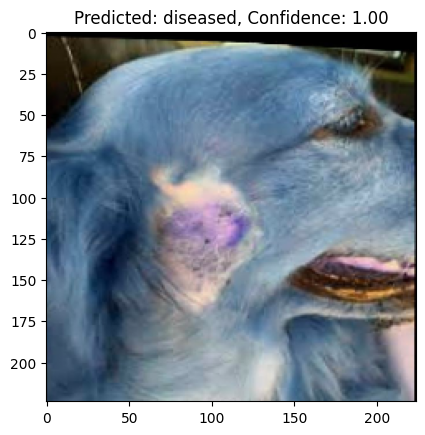

: 

In [ ]:
import os
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import load_img
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Force TensorFlow to use CPU
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Load the pre-trained model on CPU
new_model = tf.keras.models.load_model(r"C:\Users\sebas\Desktop\di\model_fit_12-0.98.h5")

# Define image input path
input_path = r"C:\Users\sebas\Desktop\di\test\diseased\hotspot-12-_jpg.rf.666e376beee592129f7b00b5500e9a59.jpg"

# Function to load and preprocess the image
def load_image(filename):
    IMAGE_SIZE = [224, 224]
    img = cv2.imread(filename)
    img = cv2.resize(img, (IMAGE_SIZE[0], IMAGE_SIZE[1]))
    img = img / 255.0  # Normalize pixel values
    return img

# Load classes from the dataset directory
data = tf.keras.utils.image_dataset_from_directory(r"C:\Users\sebas\Desktop\di\train")
classes = data.class_names  # Assumes 2 classes for binary classification

# Prediction function for binary classification
def predict(image):
    # Get the probability for the "positive" class (class index 1)
    probability = new_model.predict(np.asarray([image]))[0][0]
    
    # Determine the predicted class based on the probability threshold (e.g., 0.5)
    predicted_class = classes[1] if probability > 0.5 else classes[0]
    confidence = probability if probability > 0.5 else 1 - probability
    
    return {"Predicted Class": predicted_class, "Confidence": confidence}

# Load and predict the image
img = load_image(input_path)
prediction = predict(img)

# Display the result
print("ACTUAL FILE: %s, PREDICTED: %s, CONFIDENCE: %.2f" %
      (os.path.basename(input_path), prediction["Predicted Class"], prediction["Confidence"]))
plt.imshow(img)
plt.title(f"Predicted: {prediction['Predicted Class']}, Confidence: {prediction['Confidence']:.2f}")
plt.show()
